# Source & Sink in a Freestream

In this notebook the solution of a potential flow by adding a source, a sink and a uniform free stream will built via superpopisition: $\nabla^2 \phi = 0$.

## Let's get started!

Let's get used the same libraries as before: __Numpy__ and __Matplotlib__. The _math_ environment will be also loaded.

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline

First, the grid of coordentates points will be created similar to the Lesson01 notebook

In [2]:
N = 200

x_start, x_end = -4.0, 4.0
y_start, y_end = -2.0, 2.0

x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)

X, Y = np.meshgrid(x, y)

np.shape(X)

(200, 200)

## Source in a uniform flow

This is a quite basic potential flow consisting of the superposition of the source and uniform flow solutions. The first one was addressed in the previous lesson,

$$u_r(r, \theta) = \frac{\sigma}{2\pi r}, \qquad u_\theta (r, \theta) = 0,$$

with

$$\phi = \frac{\sigma}{2\pi} \log\sqrt{(x - x_0)^2 + (y - y_0)^2}.$$

On the contrary, the potential solution for a uniform flow of magnitude $U_\infty$ is given by

$$\phi = U_\infty x.$$

Finally, the combination of both solutions yields,

$$\phi = U_\infty x + \frac{\sigma}{2\pi} \log\sqrt{(x - x_0)^2 + (y - y_0)^2},$$

with can be translated into the velocity field as

$$\mathbf{u}(r,\theta) = \left(\frac{\sigma}{2\pi r} + U_\infty \cos\theta\right)\vec{e}_r - U_\infty\sin\theta\vec{e}_\theta.$$

On the other hand, can also be interested to obtain the streamfunction,

$$\psi = U_\infty r \sin\theta + \frac{\sigma}{2\pi} \theta = U y + \frac{\sigma}{2\pi} \arctan\left(\frac{y - y_0}{x - x_0}\right),$$

resulting in the same velocity solution, of course.

In summary,

$$u_{source}(x, y) = \frac{\sigma}{2\pi} \frac{x - x_0}{(x - x_0)^2 + (y - y_0)^2}$$

$$v_{source}(x, y) = \frac{\sigma}{2\pi} \frac{y - y_0}{(x - x_0)^2 + (y - y_0)^2}$$

In [3]:
u_inf = 1.0        # freestream speed

# compute the freestream velocity field
u_freestream = u_inf*np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

# compute the stream-function
psi_freestream = u_inf*Y

Now, let's define a function called get_velocity() to compute the velocity components of a source $(u,v)$ on a mesh $(X,Y)$, given the strength of the singularity and its location $(x_0,y_0)$

In [4]:
def get_velocity(sigma, x0, y0, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    sigma: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """    
    
    u = sigma/(2*np.pi)*(X - x0)/((X - x0)**2 + (Y - y0)**2)
    v = sigma/(2*np.pi)*(Y - y0)/((X - x0)**2 + (Y - y0)**2)
    
    return u, v

In [5]:
help (get_velocity)

Help on function get_velocity in module __main__:

get_velocity(sigma, x0, y0, X, Y)
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    sigma: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.



In [6]:
def get_streamfunction(sigma, x0, y0, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    sigma: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """    
    
    psi = sigma/(2*np.pi)*np.arctan2((Y - y0), (X - x0))
    
    return psi

In [7]:
help(get_streamfunction)

Help on function get_streamfunction in module __main__:

get_streamfunction(sigma, x0, y0, X, Y)
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    sigma: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.



The stagnation points in the flow are points where the velocity is zero (stagnant fluid, get it?). To find their location, we solve the following equations:

$$u = 0 , \quad v = 0$$
which leads to:

$$x_\text{stagnation} = x_\text{source} - \frac{\sigma}{2\pi U_\infty}$$$$y_\text{stagnation} = y_\text{source}$$

In [8]:
sigma_source = 5.0            # strength of the source
x_source, y_source = -1.0, 0.0   # location of the source

# compute the velocity field
u_source, v_source = get_velocity(sigma_source, x_source, y_source, X, Y)

# compute the streamfunction
psi_source = get_streamfunction(sigma_source, x_source, y_source, X, Y)

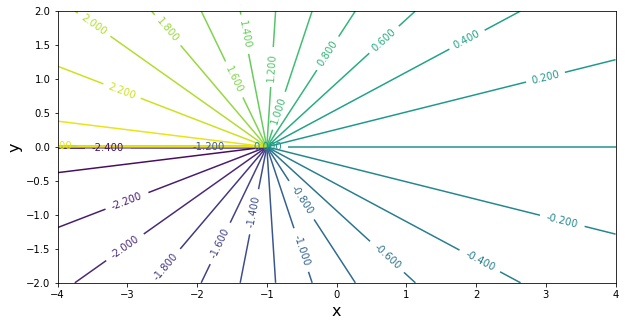

In [9]:
width = 10.0
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
CS = plt.contour(X, Y, psi_source, 32);
plt.clabel(CS);

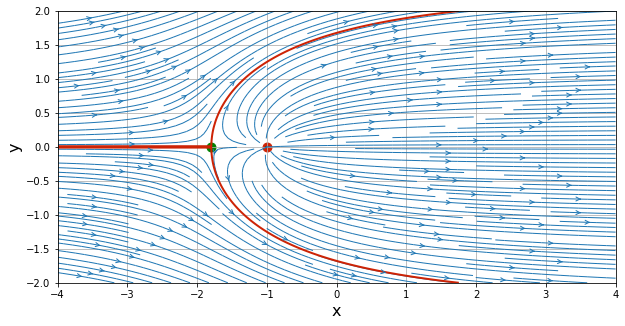

In [10]:
# superposition of the source on the freestream
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

# plot the streamlines
width = 10
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

# calculate the stagnation point
x_stagnation = x_source - sigma_source/(2*np.pi*u_inf)
y_stagnation = y_source

# display the stagnation point
plt.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

# display the dividing streamline
plt.contour(X, Y, psi, 
               levels=[-sigma_source/2, sigma_source/2], 
               colors='#CD2305', linewidths=2, linestyles='solid');

## Source-sink pair in a uniform flow

In [18]:
sigma_sink = -5.0        # strength of the sink
x_sink, y_sink = 1.0, 0.0   # location of the sink

# compute the velocity field on the mesh grid
u_sink, v_sink = get_velocity(sigma_sink, x_sink, y_sink, X, Y)

# compute the stream-function on the grid mesh
psi_sink = get_streamfunction(sigma_sink, x_sink, y_sink, X, Y)

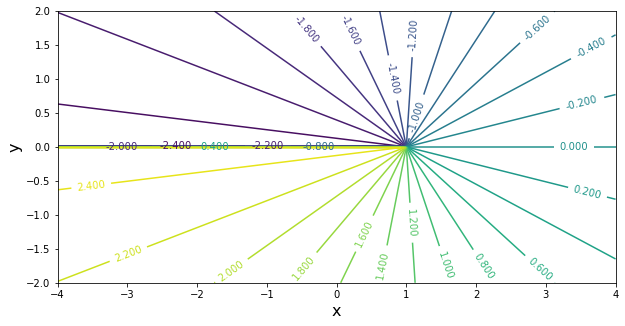

In [19]:
width = 10.0
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
CS = plt.contour(X, Y, psi_sink, 32);
plt.clabel(CS);

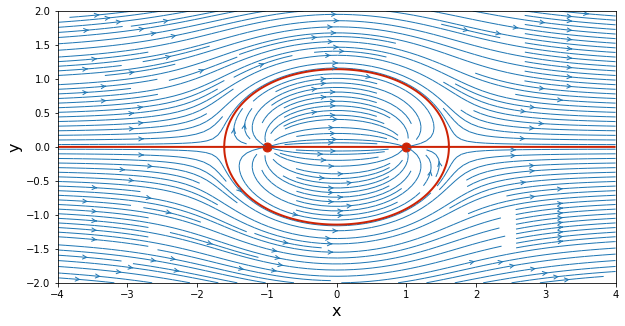

In [20]:
# superposition of a source and a sink on the freestream
u = u_freestream + u_source + u_sink
v = v_freestream + v_source + v_sink
psi = psi_freestream + psi_source + psi_sink

# plot the streamlines
width = 10
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter([x_source, x_sink], [y_source, y_sink],
               color='#CD2305', s=80, marker='o')
plt.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

### Challenge question
What is the length and width of the Rankine oval?

The length is easily computed from the stagnation points, i.e.

$$x_\text{stagnation} = x_\text{source} - \frac{\sigma}{2\pi U_\infty},$$
$$y_\text{stagnation} = y_\text{source},$$

so

$$L = 2 x_\text{stagnation} = 2 x_\text{source} - \frac{\sigma}{\pi U_\infty}$$

On the other hand, the most distant vertical points coincide with the highest velocites so

